In [34]:
import pandas as pd

df = pd.read_csv("C:/Users/Macsi/PycharmProjects/NeuralNetworks/labs/Laptop_price.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             1000 non-null   object 
 1   Processor_Speed   1000 non-null   float64
 2   RAM_Size          1000 non-null   int64  
 3   Storage_Capacity  1000 non-null   int64  
 4   Screen_Size       1000 non-null   float64
 5   Weight            1000 non-null   float64
 6   Price             1000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 54.8+ KB


# Check for missing values

In [35]:
print(df.isnull().sum())

Brand               0
Processor_Speed     0
RAM_Size            0
Storage_Capacity    0
Screen_Size         0
Weight              0
Price               0
dtype: int64


In [36]:
print(df['Brand'].unique())

['Asus' 'Acer' 'Lenovo' 'HP' 'Dell']


# Encode brand using one-hot encoding

In [37]:
df = pd.get_dummies(df, columns=['Brand'], prefix='Brand')

In [38]:
df.head()

,Processor_Speed,RAM_Size,Storage_Capacity,Screen_Size,Weight,Price,Brand_Acer,Brand_Asus,Brand_Dell,Brand_HP,Brand_Lenovo
0,3.830296,16,512,11.185147,2.641094,17395.093065,False,True,False,False,False
1,2.912833,4,1000,11.311372,3.260012,31607.605919,True,False,False,False,False
2,3.241627,4,256,11.853023,2.029061,9291.023542,False,False,False,False,True
3,3.806248,16,512,12.280360,4.573865,17436.728334,True,False,False,False,False
4,3.268097,32,1000,14.990877,4.193472,32917.990718,True,False,False,False,False


# Use descriptive statistics to identify outliers

In [39]:
print(df.describe())

       Processor_Speed     RAM_Size  Storage_Capacity  Screen_Size  \
count      1000.000000  1000.000000       1000.000000  1000.000000   
mean          2.750611    15.500000        584.576000    14.056790   
std           0.731796    10.988665        313.438517     1.705882   
min           1.511580     4.000000        256.000000    11.012111   
25%           2.089246     8.000000        256.000000    12.635523   
50%           2.760885    16.000000        512.000000    14.099643   
75%           3.362610    32.000000       1000.000000    15.528590   
max           3.998534    32.000000       1000.000000    16.985737   

            Weight         Price  
count  1000.000000   1000.000000  
mean      3.466919  19604.187963  
std       0.866541   9406.064880  
min       2.000560   8570.012950  
25%       2.717211  10114.012948  
50%       3.464630  17287.241878  
75%       4.212583  31566.214754  
max       4.990728  33503.935037  


# Scaling data

In [40]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']] = scaler.fit_transform(df[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']])

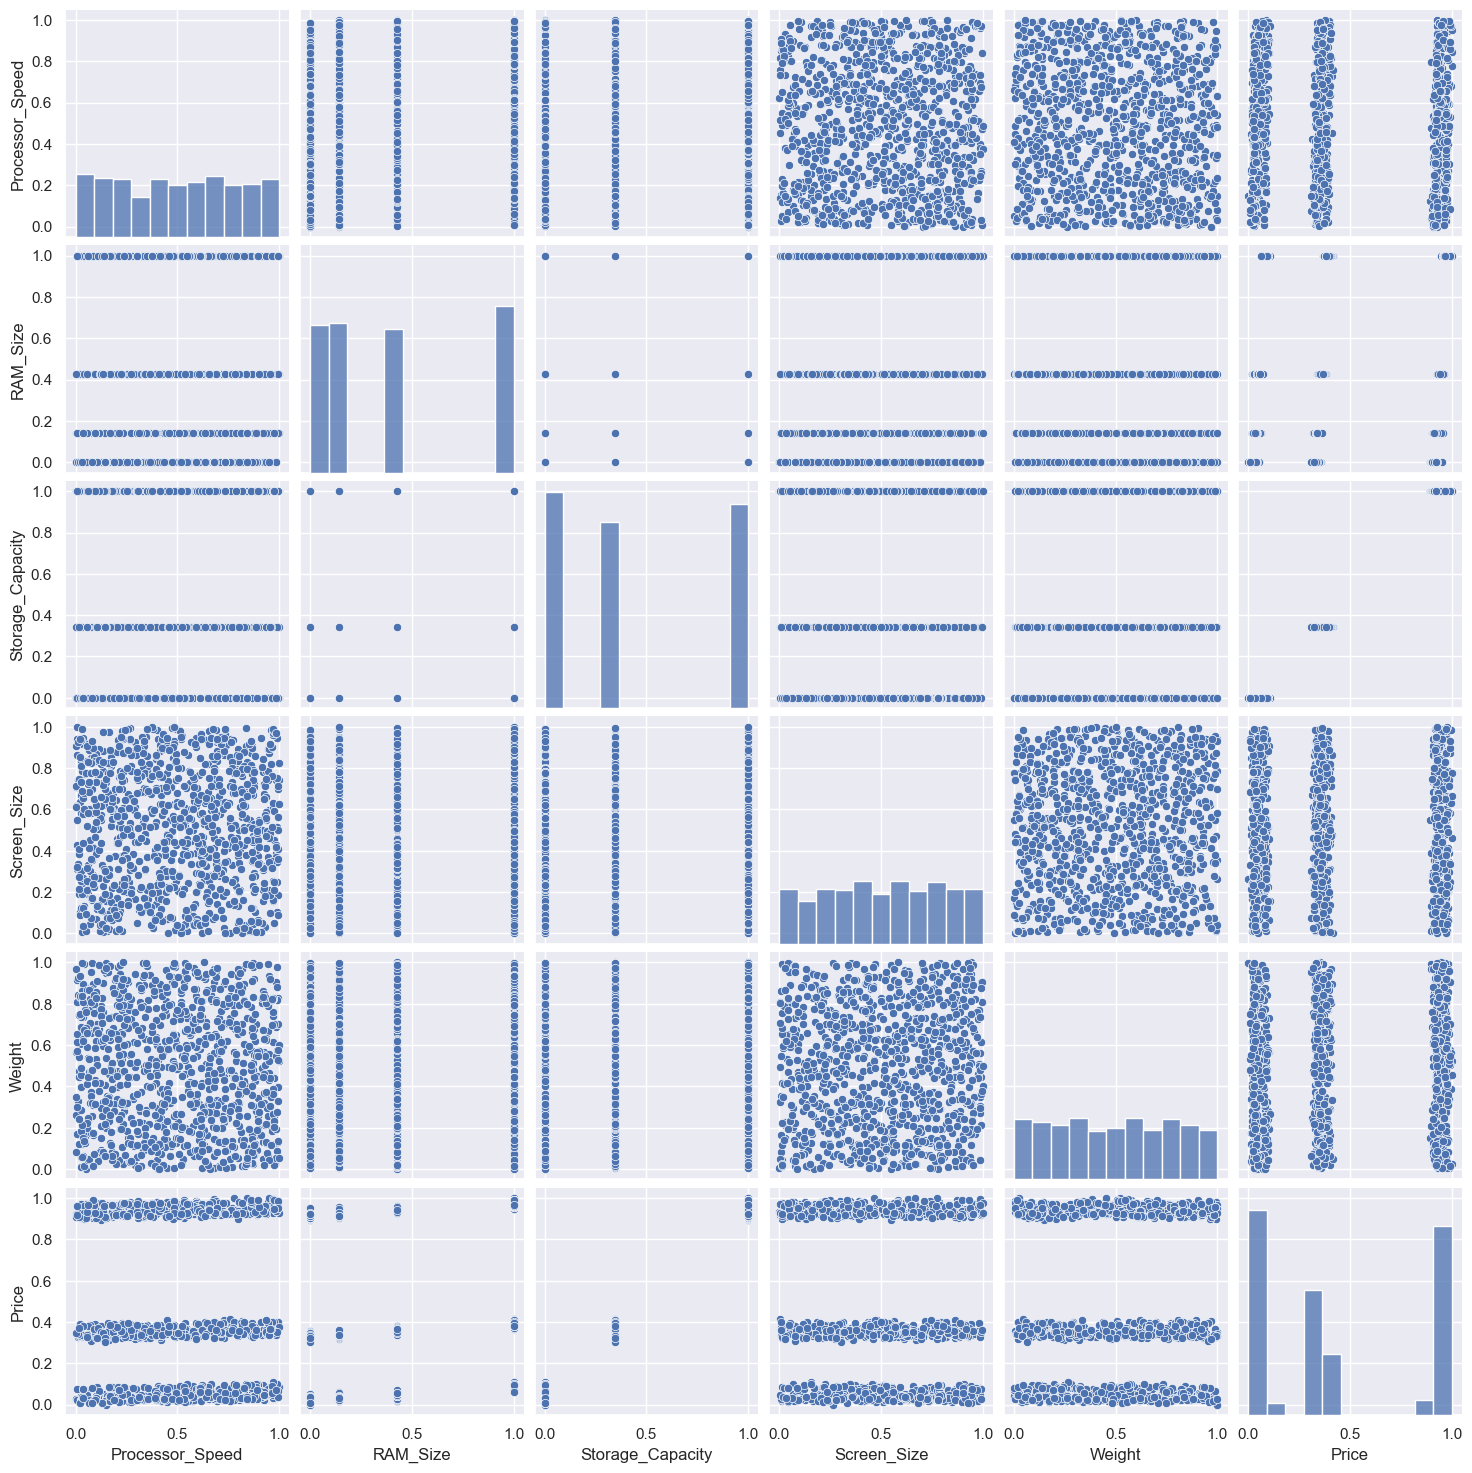

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

sns.pairplot(df[['Processor_Speed', 'RAM_Size', 'Storage_Capacity', 'Screen_Size', 'Weight', 'Price']])
plt.show()

# building correlation matrix

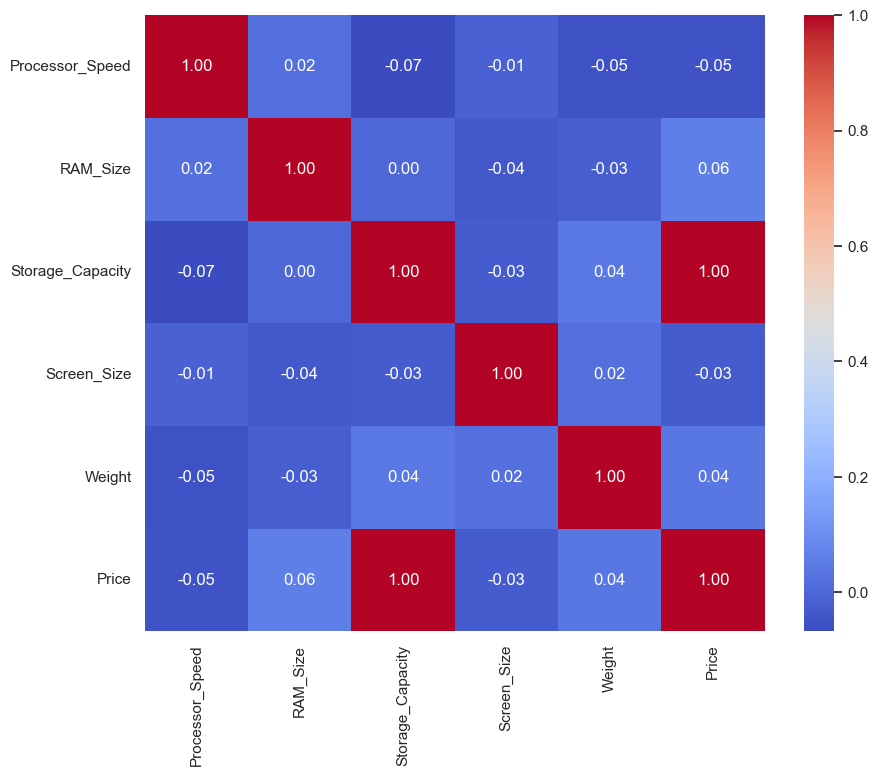

In [42]:
import numpy as np

numeric_columns = df.select_dtypes(include=[np.number]).columns
numeric_columns_without_brand = [col for col in numeric_columns ]
df_numeric = df[numeric_columns_without_brand]
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

# Analyzing Price closely

<Axes: >

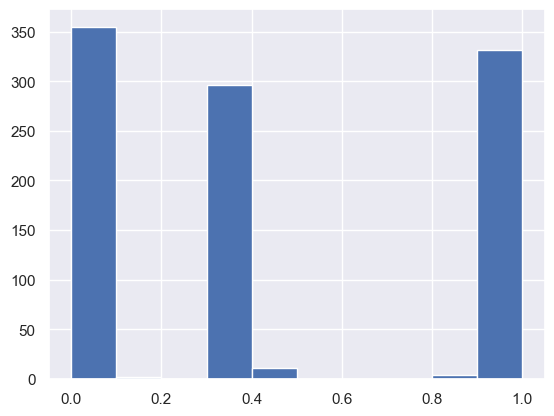

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

df['Price_Category'] = pd.cut(df['Price'], bins=[0, 0.2, 0.5, 1], labels=['Low', 'Medium', 'High'])

df["Price"].hist()

# Calculate Gain Ratio

In [44]:
import numpy as np

def calculate_gain_ratio(data, target_column, attribute_column):
    total_entropy = calculate_entropy(data[target_column])

    attribute_values = data[attribute_column].unique()
    weighted_entropy = 0

    for value in attribute_values:
        subset = data[data[attribute_column] == value]
        subset_size = len(subset)
        subset_entropy = calculate_entropy(subset[target_column])
        weighted_entropy += (subset_size / len(data)) * subset_entropy

    information_gain = total_entropy - weighted_entropy

    split_information = calculate_entropy(data[attribute_column])

    gain_ratio = information_gain / split_information if split_information != 0 else 0

    return gain_ratio

def calculate_entropy(column):
    column = column.astype(str)

    values, counts = np.unique(column, return_counts=True)
    probabilities = counts / len(column)
    entropy = -np.sum(probabilities * np.log2(probabilities))

    return entropy

target_column = 'Price_Category'

for attribute_column in df.columns:
    if attribute_column != 'Price' and df[attribute_column].dtype in [np.int64, np.float64]:
        gain_ratio = calculate_gain_ratio(df, target_column, attribute_column)
        print(f"Gain Ratio for {attribute_column}: {gain_ratio}")

Gain Ratio for Processor_Speed: 0.16054674970049634
Gain Ratio for RAM_Size: 0.0032222705054616094
Gain Ratio for Storage_Capacity: 0.998735954046842
Gain Ratio for Screen_Size: 0.16054674970049634
Gain Ratio for Weight: 0.16054674970049634
